In [1]:
import pandas as pd
import numpy as np
from juanFunciones import *
import matplotlib
%matplotlib inline

In [2]:
types = {
 "event" : "category", 
 "person" : "category", 
 "url" : "category", 
 "sku" : "category", 
 "model" : "category", 
 "condition" : "category", 
 "storage" : "category", 
 "color" : "category", 
 "staticpage" : "category", 
 "campaign_source" : "category", 
 "search_engine" : "category", 
 "channel" : "category", 
 "new_vs_returning" : "category", 
 "city" : "category", 
 "region" : "category", 
 "country" : "category", 
 "device_type" : "category", 
 "screen_resolution" : "category", 
 "operating_system_version" : "category", 
 "browser_version" : "category",
    "os" : "category",
    "model_brand": "category",
    "label":"category"
}

In [3]:
df = pd.read_csv("trainDF.csv", parse_dates=["timestamp"], dtype=types).rename(columns={"Unnamed: 0": "index"})

/home/juan/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
labels = pd.read_csv("all/labels_training_set.csv")

In [92]:
labels.groupby("label").person.count()

label
0    18434
1      980
Name: person, dtype: int64

In [12]:
byEvents = df.groupby("event").person.value_counts()

In [14]:
peopleByConv = byEvents["conversion"]

In [24]:
dfConvs = df.set_index("person").loc[peopleByConv.index].join(peopleByConv).rename(columns={"person":"conversionCount"})

In [28]:
dfConvs = dfConvs.drop("index", axis=1)

In [30]:
dfConvs.head(3).columns

Index(['timestamp', 'event', 'url', 'sku', 'model', 'condition', 'storage',
       'color', 'skus', 'search_term', 'staticpage', 'campaign_source',
       'search_engine', 'channel', 'new_vs_returning', 'city', 'region',
       'country', 'device_type', 'screen_resolution',
       'operating_system_version', 'browser_version', 'label',
       'conversionCount'],
      dtype='object')

In [32]:
dfConvs = filteredDf(dfConvs, "conversion")

In [41]:
dfC = dfConvs.reset_index().join(pd.get_dummies(dfConvs.reset_index().drop(columns=["conversionCount","person", "timestamp"])))

In [44]:
dfC = dfC.drop(columns=['event', 'sku', 'model', 'condition', 'storage',
       'color', 'skus'])

In [80]:
y = dfC.label
X = dfC.drop(columns="label")

In [84]:
X = X.set_index(["person", "timestamp"]).reset_index()

In [85]:
X["week"] = X.timestamp.dt.week

In [86]:
X = X.drop(columns=["timestamp", "person", 'label_0.0', 'label_1.0'])

In [87]:
from sklearn.linear_model import SGDClassifier


In [88]:
from sklearn.model_selection import cross_val_score
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
scores = cross_val_score(clf, X, y, cv=10)
scores

array([0.86554622, 0.8767507 , 0.71428571, 0.8767507 , 0.28851541,
       0.85434174, 0.81741573, 0.84831461, 0.82816901, 0.8       ])

In [79]:
y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
6       0.0
7       0.0
8       0.0
9       0.0
10      0.0
11      0.0
12      0.0
13      0.0
14      0.0
15      0.0
16      0.0
17      0.0
18      0.0
19      0.0
20      0.0
21      0.0
22      0.0
23      0.0
24      0.0
25      0.0
26      0.0
27      0.0
28      0.0
29      0.0
       ... 
3534    0.0
3535    0.0
3536    0.0
3537    0.0
3538    0.0
3539    0.0
3540    0.0
3541    0.0
3542    0.0
3543    0.0
3544    0.0
3545    0.0
3546    0.0
3547    0.0
3548    0.0
3549    0.0
3550    0.0
3551    0.0
3552    0.0
3553    0.0
3554    0.0
3555    0.0
3556    0.0
3557    0.0
3558    0.0
3559    0.0
3560    0.0
3561    0.0
3562    0.0
3563    0.0
Name: label, Length: 3564, dtype: category
Categories (2, object): [0.0, 1.0]

---
# Meto valores de fecha

In [93]:
dfX = df.set_index(["person", "timestamp"]).reset_index()

In [94]:
dfX = dfX.drop(columns=["timestamp"])

In [5]:
df["month"] = df.timestamp.dt.month
df["dayOfYear"] = df.timestamp.dt.dayofyear
df["dayOfWeek"] = df.timestamp.dt.dayofweek
df["week"] = df.timestamp.dt.weekofyear

In [46]:
df1 = df.drop(columns="timestamp")

In [47]:
df1.event.value_counts()

viewed product       629233
brand listing        105993
visited site         102299
ad campaign hit       94998
generic listing       80453
searched products     63887
search engine hit     52829
checkout              32539
staticpage             5660
conversion             3564
lead                    431
Name: event, dtype: int64

In [48]:
persons = df1.person

In [49]:
df1D = df1.drop(columns="person")

In [50]:
X=pd.get_dummies(filteredDf(df1D, "lead").drop(columns= "event")).drop(columns="index")

In [52]:
X1 = X.join(persons).set_index("person")

In [53]:
X1

month  dayOfYear  dayOfWeek  week  model_Asus Zenfone 3 Max 16 GB  \
person                                                                        
a6e1b6a0      4        108          2    16                               0   
b0e0113e      2         43          0     7                               0   
4115546b      2         34          5     5                               0   
5f10bcb4      3         87          2    13                               0   
f430b2fd      4        100          1    15                               0   

          model_LG  X Screen  model_LG G3 Beat D724  model_LG G3 D855  \
person                                                                  
a6e1b6a0                   0                      0                 0   
b0e0113e                   0                      0                 0   
4115546b                   0                      0                 0   
5f10bcb4                   0                      0                 0   
f430b2fd                   0                      0                 0   

          model_LG G3 Stylus D690  model_LG G4 Beat H736    ...      \
person                                                      ...       
a6e1b6a0                        0                      0    ...       
b0e0113e                        0                      0    ...       
4115546b                        0                      0    ...       
5f10bcb4                        0                      0    ...       
f430b2fd                        0                      0    ...       

          model_Samsung Galaxy Tab A 2016 10.1  W-Fi + 4G  \
person                                                      
a6e1b6a0                                                0   
b0e0113e                                                0   
4115546b                                                0   
5f10bcb4                                                0   
f430b2fd                                                0   

          model_Samsung Galaxy S3 Neo Duos i9300i  \
person                                              
a6e1b6a0                                        0   
b0e0113e                                        0   
4115546b                                        0   
5f10bcb4                                        0   
f430b2fd                                        0   

          model_iPad Mini 4 Wi-Fi + 4G  model_LG G2 Mini D618  \
person                                                          
a6e1b6a0                             0                      0   
b0e0113e                             0                      0   
4115546b                             0                      0   
5f10bcb4                             0                      0   
f430b2fd                             0                      0   

          model_LG Nexus 4  model_Motorola Moto G1 3G  \
person                                                  
a6e1b6a0                 0                          0   
b0e0113e                 0                          0   
4115546b                 0                          0   
5f10bcb4                 0                          0   
f430b2fd                 0                          0   

          model_Samsung Galaxy S Duos 2  model_Sony Xperia Z ULTRA  label_0.0  \
person                                                                          
a6e1b6a0                              0                          0          1   
b0e0113e                              0                          0          1   
4115546b                              0                          0          1   
5f10bcb4                              0                          0          1   
f430b2fd                              0                          0          1   

          label_1.0  
person               
a6e1b6a0          0  
b0e0113e          0  
4115546b          0  
5f10bcb4          0  
f430b2fd          0  

[5 rows x 204 columns]

In [101]:
X=pd.get_dummies(filteredDf(dfX, "conversion"))

X = X.drop(columns=["label_0.0", "label_1.0"])

In [102]:
from sklearn.model_selection import cross_val_score
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
scores = cross_val_score(clf, X, y, cv=10)
scores

array([0.8767507 , 0.8767507 , 0.1232493 , 0.8767507 , 0.8767507 ,
       0.8767507 , 0.12078652, 0.87921348, 0.87887324, 0.12112676])

---
# Cantidad de eventos por usuario

In [31]:
eventCount = df.groupby("person").event.value_counts().unstack(1)

In [32]:
labelsCount = labels.set_index("person").join(eventCount)

In [35]:
labelsCount = labelsCount.join(df.groupby("person").event.count())

In [36]:
labelsCount = labelsCount.sort_values("event")

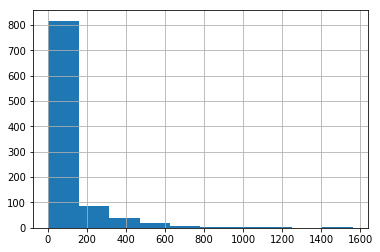

In [43]:
labelsCount[labelsCount["label"]==1].event.hist()

---
# gente que ya compro

In [49]:
peopleWhoConverted = df.groupby("event").person.value_counts()["conversion"].index

In [53]:
labels.groupby("label").person.count()

label
0    18434
1      980
Name: person, dtype: int64

In [63]:
labels.set_index("person").loc[peopleWhoConverted].label.value_counts()

0    1967
1     197
Name: label, dtype: int64

---

In [57]:
X = X1.drop(columns=["label_0.0", "label_1.0"])

In [59]:
y = filteredDf(df1, "lead").label

In [64]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline



In [63]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [65]:
clf = Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC())),
  ('classification', RandomForestClassifier())
])

In [69]:
cross_val_score(clf, X, y, cv=5, scoring="roc_auc" )

/home/juan/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/juan/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/juan/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/juan/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/juan/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Libline

array([0.43241627, 0.75657895, 0.74969697, 0.63515152, 0.57733333])

In [74]:
X2=pd.get_dummies(filteredDf(df1, "lead"))

X2 = X2.drop(columns=["label_0.0", "label_1.0"])

In [76]:
x3 = pd.concat([X, X2])

/home/juan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


Index(['index', 'month', 'dayOfYear', 'dayOfWeek', 'week',
       'event_ad campaign hit', 'event_checkout', 'event_conversion',
       'event_search engine hit', 'event_searched products',
       ...
       'skus_8233,8247,8261,8219,8190,8175,8205,71,94,87,2830,2710',
       'skus_8261,8218,6831,8966,6930,6985', 'skus_8287',
       'skus_8302,12268,12254,12408,12394,8288,8415,4571,4559,4585,9146,9328',
       'skus_8513,8541,8527,8555,9230,11709,8485,8471,8443,8498',
       'skus_9286,9272',
       'skus_9398,9412,9426,10924,10952,10938,3191,3179,3203,2720,2719,2679',
       'skus_9498,466,6355,3216,3179,3035,12758,9552,963,12717,7659,5208',
       'skus_9679,9664,2792,2718,2821,2787,2741,6791,6819,6805,2745,2702',
       'skus_9903,11891,10085,9987,10322,9944,9930,10154,10294,10113,10337,10128'],
      dtype='object', length=23188)

In [71]:
X=pd.get_dummies(filteredDf(df1, "conversion"))

X = X.drop(columns=["label_0.0", "label_1.0"])

In [72]:
y = filteredDf(df1, "conversion").label

In [73]:
cross_val_score(clf, X, y, cv=5, scoring="roc_auc" )

/home/juan/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/juan/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/juan/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/juan/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/juan/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Libline

array([0.65241069, 0.61928501, 0.59043002, 0.56950805, 0.60815632])